# PAD Project 2022-2023

---
# Part II

## Regression Analysis

1.  Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.


2. Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?


3. Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?


4. Write the population regression equation for your model. Interpret the meaning of the values of the parameters $\beta_{0}$ and $\beta_{1}$.


5. Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both.


6. Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.


7. Construct and interpret a $95\%$ confidence interval for the unknown true slope of the regression line.


8. Construct a $95\%$ confidence interval for the population correlation coefficient. Interpret the results.


9. Construct and interpret a $95\%$ confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.


10. Construct and interpret a $95\%$ confidence interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

### Breast Cancer Wisconsin (Diagnostic) Data Set

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

# Apply the default theme to seaborn
sns.set_theme()

In [2]:
# Loading the dataset as a pandas df
data = pd.read_csv("../data/breast_cancer_mod.csv")
data.head()

,diagnosis_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Splitting the data in target and inputs variables
inputs, target = data['smoothness_mean'], data['fractal_dimension_mean']

# to numpy array
x , y = inputs.values, target.values

In [4]:
# Summary statistics of the two selected variables
data[['smoothness_mean', 'fractal_dimension_mean']].describe()

,smoothness_mean,fractal_dimension_mean
count,569.000000,569.000000
mean,0.096360,0.062798
std,0.014064,0.007060
min,0.052630,0.049960
25%,0.086370,0.057700
50%,0.095870,0.061540
75%,0.105300,0.066120
max,0.163400,0.097440


---
### Scatter plot of the variables
1.  Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.

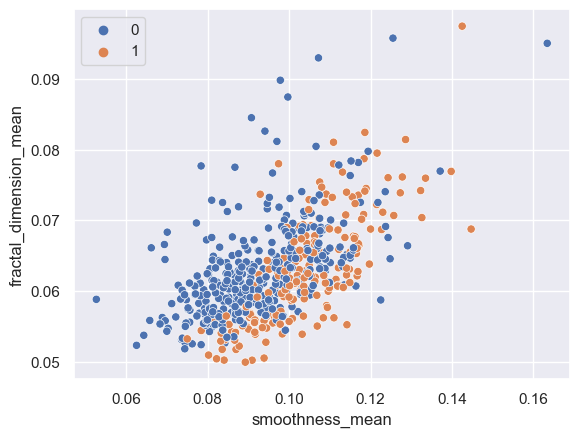

In [5]:
# Scatterplot of the variables
sns.scatterplot(data, x='smoothness_mean', y='fractal_dimension_mean', hue='diagnosis_M')
plt.legend()
plt.show()

---
### Linear Regression of the variables
2. Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?

In [6]:
# Least Mean Square 
A = np.vstack([x, np.ones(len(x))]).T

b1, b0 = np.linalg.lstsq(A, y, rcond=None)[0]

print(f'b1 coefficient: {b1}')
print(f'intercept: {b0}')

b1 coefficient: 0.29357267318765623
intercept: 0.03450886450227413


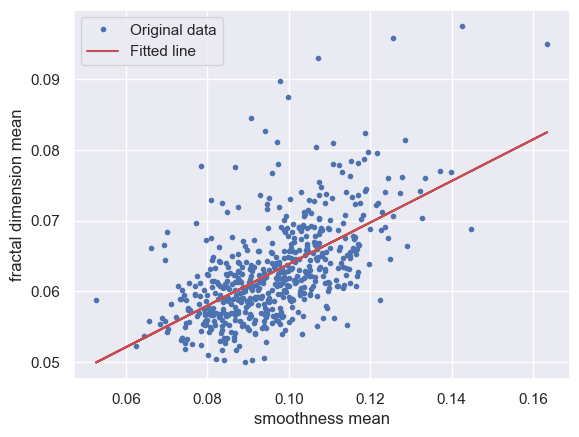

In [7]:
# Plotting x and y
plt.plot(x, y, 'o', label='Original data', markersize=3)
plt.plot(x, b1*x + b0, 'r', label='Fitted line')
plt.xlabel('smoothness mean')
plt.ylabel('fractal dimension mean')
plt.legend()
plt.show()

In [8]:
# Computing the Residuals 
predictions = b1*x + b0
residuals = y - predictions

# Standardizing the residuals
residuals_standard_error = np.std(residuals)
residuals_mean = np.mean(residuals)
standardized_residuals = residuals/residuals_standard_error

# The residuals should have a mean of 0 
print(f'Mean of the residuals: {residuals_mean:.4f}')

# The standardized residuals should have a mean of 0 and a standard deviation of 1
print(f'Mean of the standardized residuals: {np.mean(standardized_residuals):.4f}')
print(f'Standard error of the standardized residuals: {np.std(standardized_residuals):.4f}')

Mean of the residuals: 0.0000
Mean of the standardized residuals: 0.0000
Standard error of the standardized residuals: 1.0000


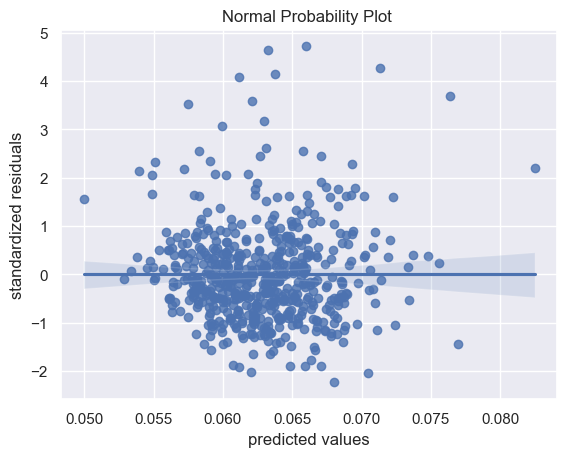

In [9]:
# Normal Probability Plot of the standardized residuals
sns.regplot(x=predictions, y=standardized_residuals)
plt.title('Normal Probability Plot ')
plt.xlabel('predicted values')
plt.ylabel('standardized residuals')
plt.show()

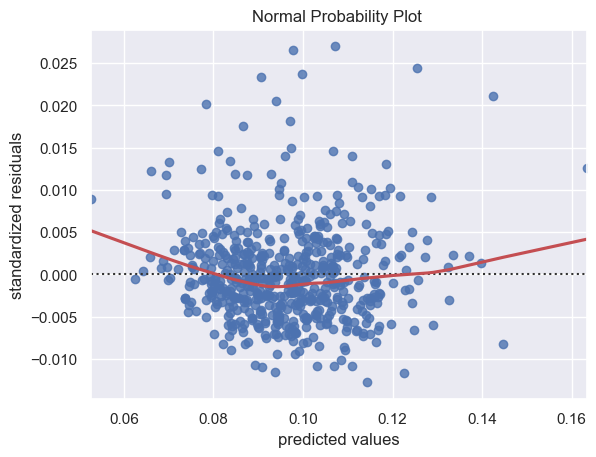

In [10]:
sns.residplot(data=data, x="smoothness_mean", y="fractal_dimension_mean", lowess=True, line_kws=dict(color="r"))
plt.title('Normal Probability Plot ')
plt.xlabel('predicted values')
plt.ylabel('standardized residuals')
plt.show()

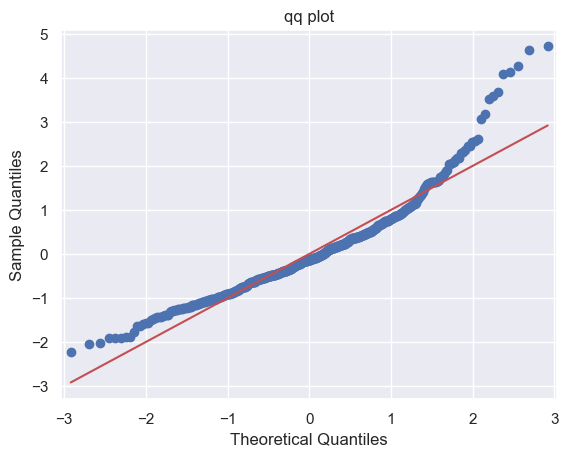

In [11]:
## qq-plot of the residuals
# “s” - standardized line, the expected order statistics are scaled by the standard deviation of the given 
# sample and have the mean added to them
fig = sm.qqplot(residuals, line="s", fit=True)  
plt.title('qq plot')
plt.show()

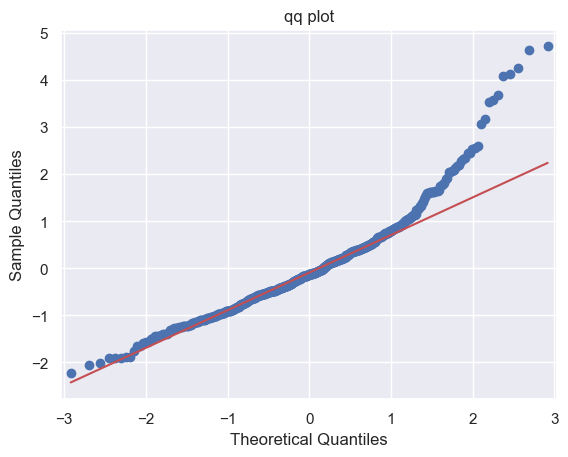

In [12]:
## qq-plot of the standardized residuals
fig = sm.qqplot(standardized_residuals, line="q", fit=True) # “q” - A line is fit through the quartiles.
plt.title('qq plot')
plt.show()

---
### Linear regression of the log transformations of the variables
3. Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?

In [13]:
log_x = np.log(x)  # log of the smoothness_mean
log_y = np.log(y)  # log of the fractal_dimension_mean

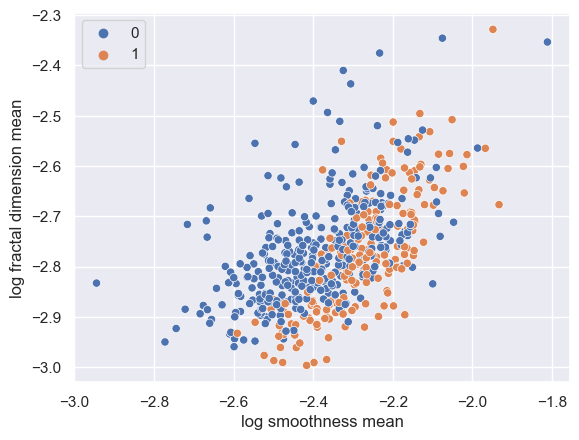

In [14]:
sns.scatterplot(x=log_x, y=log_y, hue=data['diagnosis_M'])
plt.xlabel('log smoothness mean')
plt.ylabel('log fractal dimension mean')
plt.legend()
plt.show()

In [15]:
# Least Mean Square 
A = np.vstack([log_x, np.ones(len(x))]).T

b1, b0 = np.linalg.lstsq(A, log_y, rcond=None)[0]

print(f'b1 coefficient: {b1}')
print(f'intercept: {b0}')

b1 coefficient: 0.4209740335533418
intercept: -1.7843407936415612


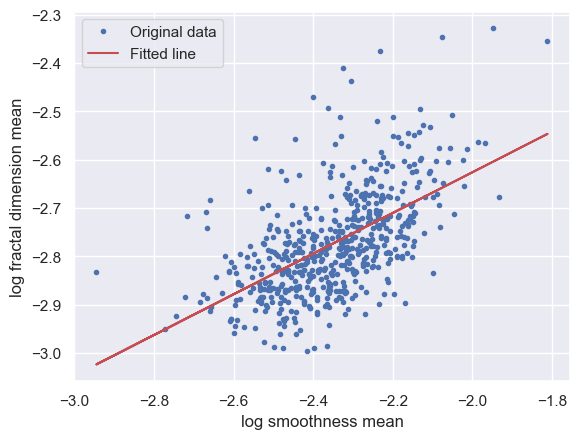

In [16]:
# Plotting x and y
plt.plot(log_x, log_y, 'o', label='Original data', markersize=3)
plt.plot(log_x, b1*log_x + b0, 'r', label='Fitted line')
plt.xlabel('log smoothness mean')
plt.ylabel('log fractal dimension mean')
plt.legend()
plt.show()

In [17]:
# Computing the Residuals 
predictions = b1*log_x + b0
residuals = log_y - predictions

# Standardizing the residuals
residuals_standard_error = np.std(residuals)
residuals_mean = np.mean(residuals)
standardized_residuals = residuals/residuals_standard_error

# The residuals should have a mean of 0 
print(f'Mean of the residuals: {residuals_mean:.4f}')

# The standardized residuals should have a mean of 0 and a standard deviation of 1
print(f'Mean of the standardized residuals: {np.mean(standardized_residuals):.4f}')
print(f'Standard error of the standardized residuals: {np.std(standardized_residuals):.4f}')

Mean of the residuals: 0.0000
Mean of the standardized residuals: 0.0000
Standard error of the standardized residuals: 1.0000


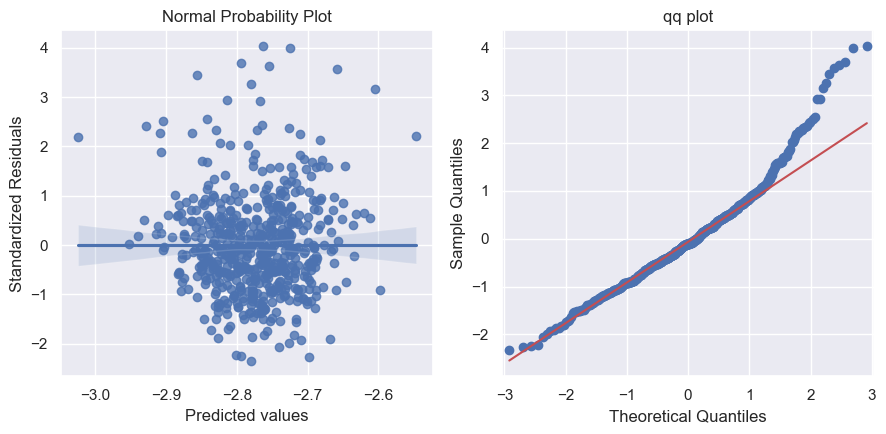

In [18]:
# Normal Probability plot & qq-plot
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)

# Normal probability plot
axes[0].set_title('Normal Probability Plot')
sns.regplot(ax=axes[0], x=predictions, y=standardized_residuals)
axes[0].set_xlabel('Predicted values')
axes[0].set_ylabel('Standardized Residuals')

# qq-plot
axes[1].set_title('qq plot')
sm.qqplot(ax=axes[1], data=standardized_residuals, line="q", fit=True) # “q” - A line is fit through the quartiles.
plt.show()

---
### Correlation & Determinacy Coefficients

5. Find the **correlation** and **determinacy** coefficients. Analyse and comment on the meaning of both.

In [19]:
# Correlation coefficient
pearson_coefficient = np.corrcoef(x, y)
print(f'Pearson Correlation Coefficient: {pearson_coefficient[0,1]:.4f}')

Pearson Correlation Coefficient: 0.5848


In [20]:
# R2 Deteminacy Coefficient
A = np.vstack([x, np.ones(len(x))]).T
b1, b0 = np.linalg.lstsq(A, y, rcond=None)[0]
predictions = b1*x + b0
residuals = y - predictions

SSR = np.sum((predictions - np.mean(y))**2)
SST = np.sum((y - np.mean(y))**2)

R2 = SSR/SST
print(f'R2: {R2:.4f}')

R2: 0.3420


---
### t-Test for the Relationship Between x and y
6. Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.

In [29]:
X = data['smoothness_mean']
y = data['fractal_dimension_mean']
X = sm.add_constant(X) # adding a constant for the intercept parameter

model = sm.OLS(y,X)
results = model.fit()
results.params

const              0.034509
smoothness_mean    0.293573
dtype: float64

In [48]:
# t-values for the regression coefficients
results.tvalues

const              20.721525
smoothness_mean    17.166192
dtype: float64

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     fractal_dimension_mean   R-squared:                       0.342
Model:                                OLS   Adj. R-squared:                  0.341
Method:                     Least Squares   F-statistic:                     294.7
Date:                    Sun, 26 Mar 2023   Prob (F-statistic):           1.69e-53
Time:                            12:52:34   Log-Likelihood:                 2130.6
No. Observations:                     569   AIC:                            -4257.
Df Residuals:                         567   BIC:                            -4249.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0345      0.002     20.722      0.000       0.031       0.038
smoothness_mean     0.2936      0.017     17.166      0.000       0.260       0.327
==============================================================================
Omnibus:                      148.079   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.323
Skew:                           1.279   Prob(JB):                     2.63e-88
Kurtosis:                       6.235   Cond. No.                         71.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
### Confidence interval for the slope of the Regression line
7. Construct and interpret a $95\%$ confidence interval for the unknown true slope of the regression line.

In [54]:
results.conf_int(alpha=0.05)

,0,1
const,0.031238,0.037780
smoothness_mean,0.259982,0.327163


---
### Confidence interval for the correlation

8. Construct a $95\%$ confidence interval for the population correlation coefficient. Interpret the results.

In [86]:
# Correlation coefficient
pearson_coefficient = float(np.corrcoef(x, y)[0,1])
print(f'Pearson Correlation Coefficient: {pearson_coefficient:.4f}')

# Degree of freedom
df = A.shape[0] - A.shape[1]
print(f'Degree of freedom: {df}')

# t critical value 
t = scipy.stats.t.ppf(1-0.025,df) 
print(f't-critical value: {t:.4f}')

interval = (t*((1-pearson_coefficient**2)/df)**(0.5))

print(f'Correlation Coefficient confidence interval: [{pearson_coefficient-interval:.4f}, {pearson_coefficient+interval:.4f}]')


Pearson Correlation Coefficient: 0.5848
Degree of freedom: 567
t-critical value: 1.9642
Correlation Coefficient confidence interval: [0.5179, 0.6517]


---
### Confidence interval for mean value of y at a given x 
9. Construct and interpret a $95\%$ confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

In [99]:
# Least Mean Square 
A = np.vstack([x, np.ones(len(x))]).T
b1, b0 = np.linalg.lstsq(A, y, rcond=None)[0]

y_p = b1*x_p + b0

# Selecting a random example from x
x_p = np.random.choice(x)

# Computing the mean of x
x_mean = np.mean(x)

# Degree of freedom
df = len(x)-2

# t critical value 
t_value = scipy.stats.t.ppf(1-0.025,df)

# interval
interval = t_value * (1/len(x) + ((x_p - x_mean)**2)/ np.sum((x-x_mean)**2))**(0.5)

# Confidence interval
print(f'Confidence interval: [{y_p-interval:.4f}, {y_p+interval:.4f}]')

Confidence interval: [-0.0706, 0.1861]


### Prediction interval for value of randomly chosen y, given x

10. Construct and interpret a $95\%$ confidence interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

In [101]:
# interval
interval = t_value * (1 + 1/len(x) + ((x_p - x_mean)**2)/ np.sum((x-x_mean)**2))**(0.5)

# Prediction interval
print(f'Prediction interval: [{y_p-interval:.4f}, {y_p+interval:.4f}]')

Prediction interval: [-1.9106, 2.0261]
